In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_merge = pd.merge(mouse,clinical,on="Mouse ID",how="outer")

# Display the data table for preview
trial_merge


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = trial_merge.groupby(['Drug','Timepoint'])
tumorvol_mean = tumor['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumorvol_df = pd.DataFrame({'Mean Tumor Volume':tumorvol_mean})
# Preview DataFrame
tumorvol_df

Mean Tumor Volume
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325
...                                ...
Zoniferol 25                 55.432935
          30                 57.713531
          35                 60.089372
          40                 62.916692
          45                 65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvol_err = tumor['Tumor Volume (mm3)'].sem()
tumorvol_err
# Convert to DataFrame
volerr_df = pd.DataFrame({'Tumor Vol Standard Error':tumorvol_err})
# Preview DataFrame
volerr_df


Tumor Vol Standard Error
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.448593
          10                         0.702684
          15                         0.838617
          20                         0.909731
...                                       ...
Zoniferol 25                         0.602513
          30                         0.800043
          35                         0.881426
          40                         0.998515
          45                         1.003576

[100 rows x 1 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumorvol_df = tumorvol_df.reset_index(drop=False)

tumor_pivot = pd.pivot_table(tumorvol_df,values='Mean Tumor Volume',index='Timepoint',columns='Drug')

volerr_df = volerr_df.reset_index(drop=False)

error_pivot = pd.pivot_table(volerr_df,values='Tumor Vol Standard Error',index='Timepoint',columns='Drug')
# Preview that Reformatting worked
error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [36]:
tumor_pivot = tumor_pivot.reset_index()
error_pivot = error_pivot.reset_index()

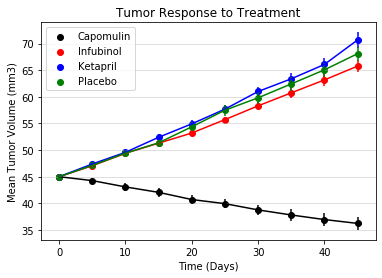

In [44]:
# Generate the Plot (with Error Bars)
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Capomulin'],label='Capomulin',c='k')
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Infubinol'],label='Infubinol',c='r')
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Ketapril'],label='Ketapril',c='b')
plt.scatter(tumor_pivot['Timepoint'],tumor_pivot['Placebo'],label='Placebo',c='g')

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.grid(which="major", axis='y',alpha=0.5)

plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Capomulin'],yerr=error_pivot['Capomulin'],c='k')
plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Infubinol'],yerr=error_pivot['Infubinol'],c='r')
plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Ketapril'],yerr=error_pivot['Ketapril'],c='b')
plt.errorbar(tumor_pivot['Timepoint'],tumor_pivot['Placebo'],yerr=error_pivot['Placebo'],c='g')


# Save the Figure
plt.show()


In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)